In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi

# 1. Avalanche df Preparation

url of Zip file:
https://www.doi.org/10.16904/envidat.134

File used in zip file: data_set_1_avalanche_observations_wi9899_to_wi1819_davos.csv

In [2]:
#Information on the columns of the orginal CSV file

#    CSV FIlE              UNIT                    DESCRIPTION

#    no                                            Avalanche number
#    date_release                                  Date of release
#    snow_type                                     Type of snow: "dry", "wet", "mixed", "unknown"
#    trigger_type                                  Type of trigger: "HUMAN", "NATURAL", "EXPLOSIVE", "UNKNOWN"
#    max_elevation_m       m                       Avalanche Maximum elevation - NOT USED
#    min_elevation_m       m                       Avalanche Minimum elevation - NOT USED
#    aspect_degrees        degree                  Avalanche Aspect - NOT USED
#    length_m              m                       Avalanche length - NOT USED
#    width_m               m                       Avalanche width - NOT USED
#    perimeter_length_m    m                       Avalanche perimeter - NOT USED
#    area_m2               m2                      Avalanche surface area
#    aval_size_class                               Avalanche size class (1 to 5) - NOT USED
#    weight_AAI                                    Avalanche activity index (AAI) - NOT USED
#    max.danger.corr                               Avalanche danger level on the day (1 to 5)

In [3]:
# import avalanche data
df_avalanche = pd.read_csv('../DataSet_Avalanche_Original_EnviDat/data_set_1_avalanche_observations_wi9899_to_wi1819_davos.csv',
                           sep = ';')
df_avalanche

,no,date_release,snow_type,trigger_type,max_elevation_m,min_elevation_m,aspect_degrees,length_m,width_m,perimeter_length_m,area_m2,aval_size_class,weight_AAI,max.danger.corr
0,1,1998-11-06,dry,NATURAL,"2,476.0","2,439.0",4.0,63.0,33.0,168.0,"1,413.0",2,0.1,nan
1,2,1998-12-07,dry,NATURAL,"2,562.0","2,484.0",42.0,101.0,123.0,355.0,"8,762.0",2,0.1,3.0
2,3,1998-12-07,dry,NATURAL,"2,494.0","2,356.0",21.0,127.0,351.0,834.0,"30,522.0",3,1.0,3.0
3,4,1998-12-07,dry,HUMAN,"2,115.0","2,017.0",200.0,166.0,85.0,454.0,"7,837.0",2,0.1,3.0
4,5,1998-12-07,dry,NATURAL,"2,085.0","1,986.0",42.0,128.0,18.0,265.0,"1,522.0",2,0.1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13913,13914,2019-04-24,wet,NATURAL,"2,554.0","2,551.0",138.0,52.0,6.0,107.0,215.0,2,0.1,3.0
13914,13915,2019-04-24,wet,NATURAL,"2,610.0","2,574.0",159.0,50.0,8.0,111.0,304.0,2,0.1,3.0
13915,13916,2019-05-07,dry,HUMAN,"2,589.0","2,567.0",307.0,36.0,14.0,82.0,340.0,1,0.0,2.0
13916,13917,2019-05-07,wet,HUMAN,"2,572.0","2,532.0",80.0,65.0,25.0,150.0,"1,044.0",2,0.1,2.0


In [4]:
# Rename column
df_avalanche.rename(columns = {'date_release':'Date', 'snow_type':'Snow_type', 'trigger_type':'Trigger_type',
                               'area_m2': 'Avalanche_size_m2', 'max.danger.corr':'Avalanche_danger_level'}, inplace = True) 
# Remove unused columns
df_avalanche.drop(columns = {'no','max_elevation_m', 'min_elevation_m', 'aspect_degrees', 'length_m', 'width_m',
                             'perimeter_length_m', 'aval_size_class', 'weight_AAI'}, inplace = True) 
# convert column Date to datetime format
df_avalanche['Date']= pd.to_datetime(df_avalanche['Date'])
# Remove NaN value
df_avalanche = df_avalanche.dropna()
# Change one column to int
df_avalanche['Avalanche_danger_level'] = df_avalanche['Avalanche_danger_level'].astype(int)
# Export example of the data
dfi.export(df_avalanche.iloc[11141:11147], '../Tables/df_avalanche.png', max_rows= 7)
df_avalanche.iloc[11141:11147]

C:\Users\lione\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level
11394,2017-03-10,wet,EXPLOSIVE,"7,022.0",4
11395,2017-03-10,dry,EXPLOSIVE,"9,953.0",4
11396,2017-03-10,dry,NATURAL,"3,306.0",4
11397,2017-03-10,dry,EXPLOSIVE,"10,339.0",4
11398,2017-03-10,dry,HUMAN,"3,925.0",4
11399,2017-03-10,dry,NATURAL,"1,411.0",4


In [5]:
# One wrong date was recorded
# found because in Meteo df there was a big snow fall between 2005_12_16 and 2005_12_17, with more than 50cm of new snow
# it is not possible that 240 avalanches are happening only in the beginning of this snow fall
# Print df_meteo between 2 dates, as example of the data
start_date = "2005-12-15"
end_date = "2005-12-19"
after_start_date = df_avalanche['Date'] >= start_date
before_end_date = df_avalanche['Date'] <= end_date
between_two_dates = after_start_date & before_end_date
df_avalanche.loc[between_two_dates]

,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level
1816,2005-12-16,dry,UNKNOWN,"33,806.0",3
1817,2005-12-16,dry,NATURAL,"2,657.0",3
1818,2005-12-16,dry,UNKNOWN,"25,950.0",3
1819,2005-12-16,dry,UNKNOWN,"15,027.0",3
1820,2005-12-16,dry,UNKNOWN,"64,490.0",3
...,...,...,...,...,...
2057,2005-12-16,dry,UNKNOWN,"33,616.0",3
2058,2005-12-16,dry,UNKNOWN,"4,126.0",3
2059,2005-12-16,dry,NATURAL,"2,578.0",3
2060,2005-12-16,dry,UNKNOWN,"14,726.0",3


In [6]:
# correct the wrong date
df_avalanche = df_avalanche.replace(to_replace = '2005-12-16', value= '2005-12-17') 

In [7]:
# Set index = 'Date'
df_avalanche = df_avalanche.set_index('Date')
#Start_date = df_avalanche.index[0]
#End_date = df_avalanche.index[-1]
#print('Davos Avalanche Record Timeframe:            ' + str(Start_date) + ' to ' + str(End_date))
#print('Total number of avalanches recorded:         ' + str(df_avalanche.Snow_type.size))
#print('Total number of "Dry Snow" avalanches :      ' + str(df_avalanche[df_avalanche['Snow_type'] == 'dry'].Snow_type.count()))
#print('Total number of "Wet Snow" avalanches :      ' + str(df_avalanche[df_avalanche['Snow_type'] == 'wet'].Snow_type.count()))
#print('Total number of "Mixed Snow" avalanches :    ' + str(df_avalanche[df_avalanche['Snow_type'] == 'mixed'].Snow_type.count()))
#print('Total number of "Unknown Snow" avalanches :  ' + str(df_avalanche[df_avalanche['Snow_type'] == 'unknown'].Snow_type.count()))

In [8]:
# Rearrange the df, to that the number of each type of avalanche can be counted
df_avalanche['Num_wet'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'wet')
df_avalanche['Num_wet'] = df_avalanche['Num_wet'] == 'wet' 
df_avalanche['Num_wet'] = df_avalanche['Num_wet'].astype(int)

df_avalanche['Num_dry'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'dry')
df_avalanche['Num_dry'] = df_avalanche['Num_dry'] == 'dry' 
df_avalanche['Num_dry'] = df_avalanche['Num_dry'].astype(int)

df_avalanche['Num_mixed'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'mixed')
df_avalanche['Num_mixed'] = df_avalanche['Num_mixed'] == 'mixed' 
df_avalanche['Num_mixed'] = df_avalanche['Num_mixed'].astype(int)

df_avalanche['Num_unknown'] = df_avalanche['Snow_type']* (df_avalanche['Snow_type'] == 'unknown')
df_avalanche['Num_unknown'] = df_avalanche['Num_unknown'] == 'unknown' 
df_avalanche['Num_unknown'] = df_avalanche['Num_unknown'].astype(int)
df_avalanche['Num_Natural'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'NATURAL')
df_avalanche['Num_Natural'] = df_avalanche['Num_Natural'] == 'NATURAL' 
df_avalanche['Num_Natural'] = df_avalanche['Num_Natural'].astype(int)

df_avalanche['Num_Human'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'HUMAN')
df_avalanche['Num_Human'] = df_avalanche['Num_Human'] == 'HUMAN' 
df_avalanche['Num_Human'] = df_avalanche['Num_Human'].astype(int)

df_avalanche['Num_Explosive'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'EXPLOSIVE')
df_avalanche['Num_Explosive'] = df_avalanche['Num_Explosive'] == 'EXPLOSIVE' 
df_avalanche['Num_Explosive'] = df_avalanche['Num_Explosive'].astype(int)

df_avalanche['Num_Unknown_t'] = df_avalanche['Trigger_type']* (df_avalanche['Trigger_type'] == 'UNKNOWN')
df_avalanche['Num_Unknown_t'] = df_avalanche['Num_Unknown_t'] == 'UNKNOWN' 
df_avalanche['Num_Unknown_t'] = df_avalanche['Num_Unknown_t'].astype(int)
df_avalanche = df_avalanche.reset_index()
df_avalanche

,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level,Num_wet,Num_dry,Num_mixed,Num_unknown,Num_Natural,Num_Human,Num_Explosive,Num_Unknown_t
0,1998-12-07,dry,NATURAL,"8,762.0",3,0,1,0,0,1,0,0,0
1,1998-12-07,dry,NATURAL,"30,522.0",3,0,1,0,0,1,0,0,0
2,1998-12-07,dry,HUMAN,"7,837.0",3,0,1,0,0,0,1,0,0
3,1998-12-07,dry,NATURAL,"1,522.0",3,0,1,0,0,1,0,0,0
4,1998-12-07,dry,NATURAL,"5,929.0",3,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13624,2019-04-23,wet,NATURAL,970.0,2,1,0,0,0,1,0,0,0
13625,2019-04-24,wet,NATURAL,215.0,3,1,0,0,0,1,0,0,0
13626,2019-04-24,wet,NATURAL,304.0,3,1,0,0,0,1,0,0,0
13627,2019-05-07,dry,HUMAN,340.0,2,0,1,0,0,0,1,0,0


In [9]:
# Write processed df_avalanche data to csv file
df_avalanche.to_csv('../Processed_DataSets/Avalanches.csv', index = False)

In [10]:
# Change columns to int
df_avalanche['Avalanche_danger_level'] = df_avalanche['Avalanche_danger_level'].astype(int) 
df_avalanche['Avalanche_size_m2'] = df_avalanche['Avalanche_size_m2'].astype(int)
# export example of data to file
dfi.export(df_avalanche.iloc[11141:11147], '../Tables/df_avalanche_processed.png', max_rows= 7)
df_avalanche.iloc[11141:11147]

,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level,Num_wet,Num_dry,Num_mixed,Num_unknown,Num_Natural,Num_Human,Num_Explosive,Num_Unknown_t
11141,2017-03-10,wet,EXPLOSIVE,7022,4,1,0,0,0,0,0,1,0
11142,2017-03-10,dry,EXPLOSIVE,9953,4,0,1,0,0,0,0,1,0
11143,2017-03-10,dry,NATURAL,3306,4,0,1,0,0,1,0,0,0
11144,2017-03-10,dry,EXPLOSIVE,10339,4,0,1,0,0,0,0,1,0
11145,2017-03-10,dry,HUMAN,3925,4,0,1,0,0,0,1,0,0
11146,2017-03-10,dry,NATURAL,1411,4,0,1,0,0,1,0,0,0


In [11]:
# Description of the columns of the processed file Avalanche.csv
#    DF_AVALANCHE          UNIT                    DESCRIPTION

#    Date                                          Date of release
#    no                                            Avalanche number (NOT USED)
#    Snow_type                                     Type of snow: "dry", "wet", "mixed", "unknown"
#    Trigger_type                                  Type of trigger: "HUMAN", "NATURAL", "EXPLOSIVE", "UNKNOWN"
#    Avalanche_size_m2     m2                      Avalanche area
#    Avalanche_danger_level                          Avalanche danger level on the day (1 to 5)             
#    Num_wet                                       Count of "wet" type avalanches
#    Num_dry                                       Count of "dry" type avalanches
#    Num_mixed                                     Count of "mixed" type avalanches
#    Num_unknown                                   Count of "unknwown" type avalanches
#    Num_Natural                                   Count of "NATURAL" triggered avalanches
#    Num_Human                                     Count of "HUMAN" triggered avalanches
#    Num_explosive                                 Count of "EXPLOSIVE" triggered avalanches
#    Num_unknown_t                                 Count of "UNKNOWN" triggered avalanches

# 2. Some Avalanches Statistic Plots

### Histogram - Box plot of avalanche size

In [12]:
df_Level = df_avalanche.set_index(['Avalanche_danger_level','Snow_type','Date']).copy()

**Statistic about "dry" avalanches size**

In [13]:
df_Level.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2.describe()

count       7,673.0
mean       17,584.6
std        45,038.9
min           145.0
25%         2,799.0
50%         6,172.0
75%        14,708.0
max     1,034,212.0
Name: Avalanche_size_m2, dtype: float64

**Statistic about "wet" avalanches size**

In [14]:
df_Level.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2.describe()

count     4,033.0
mean     12,367.7
std      31,035.2
min         102.0
25%       2,188.0
50%       4,611.0
75%      10,526.0
max     689,478.0
Name: Avalanche_size_m2, dtype: float64

**Box plot - Avalanche size**

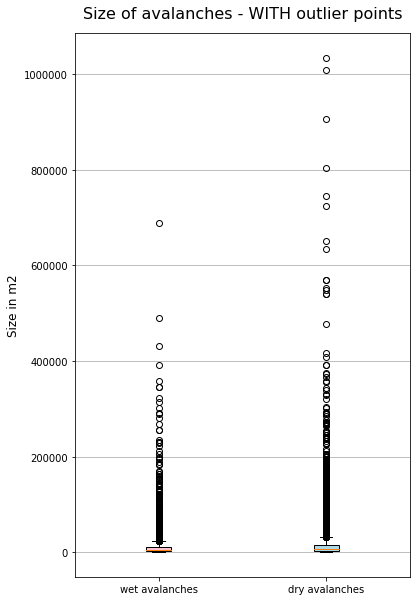

In [15]:
fig, ax1 = plt.subplots(figsize=(6, 10))
labels = ['wet avalanches', 'dry avalanches']

# rectangular box plot
bplot1 = ax1.boxplot([df_Level.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2,
                      df_Level.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2],
                     showfliers=True, vert=True, patch_artist=True, labels=labels)
ax1.set_title('Size of avalanches - WITH outlier points', fontdict={'fontsize':16}, pad = 15)

# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_ylabel('Size in m2',fontdict={'fontsize':12})
plt.savefig('../Plots/Avalanche_size_box1.jpg')
plt.show()

**Box plot - Avalanche size - Without outliers**

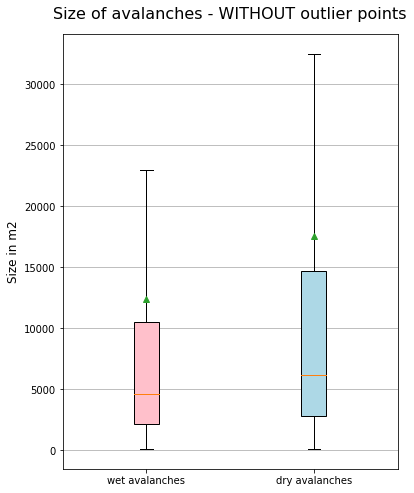

In [16]:
fig, ax2 = plt.subplots(figsize=(6, 8))
labels = ['wet avalanches', 'dry avalanches']
# rectangular box plot
bplot1 = ax2.boxplot([df_Level.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2,
                      df_Level.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2],
                     showmeans=True, showfliers=False, vert=True, patch_artist=True, labels=labels)
ax2.set_title('Size of avalanches - WITHOUT outlier points', fontdict={'fontsize':16}, pad = 15)
# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
# adding horizontal grid lines
ax2.yaxis.grid(True)
ax2.set_ylabel('Size in m2',fontdict={'fontsize':12})
plt.savefig('../Plots/Avalanche_size_box2.jpg')
plt.show()

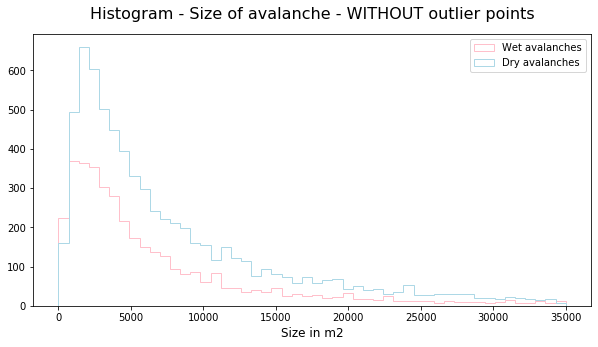

In [17]:
fig, ax3 = plt.subplots(figsize=(10, 5))
ax3.hist(df_Level.xs(('wet'), level = ('Snow_type')).Avalanche_size_m2, bins=50, color = 'pink',
         range=(0,35000), fill=False, histtype='step', label='Wet avalanches')
ax3.hist(df_Level.xs(('dry'), level = ('Snow_type')).Avalanche_size_m2, bins=50, color = 'lightblue',
         range=(0,35000), fill=False, histtype='step', label='Dry avalanches')

ax3.set_title('Histogram - Size of avalanche - WITHOUT outlier points', fontdict={'fontsize':16}, pad = 15)
ax3.set_xlabel('Size in m2',fontdict={'fontsize':12})
ax3.legend()
plt.savefig('../Plots/Avalanche_size_hist.jpg')
plt.show()

### Total Number of avalanches by years

In [18]:
df_Level_Years = df_Level.reset_index()
df_Level_Years = df_Level_Years.set_index('Date')
del df_Level_Years['Num_mixed']
del df_Level_Years['Num_unknown']
del df_Level_Years['Num_Explosive']
del df_Level_Years['Num_Unknown_t']
df_Level_Years = df_Level_Years.resample('1Y').agg({'Avalanche_size_m2':'mean', 'Num_Natural':'sum', 'Num_Human': 'sum', 'Avalanche_danger_level':'count'})

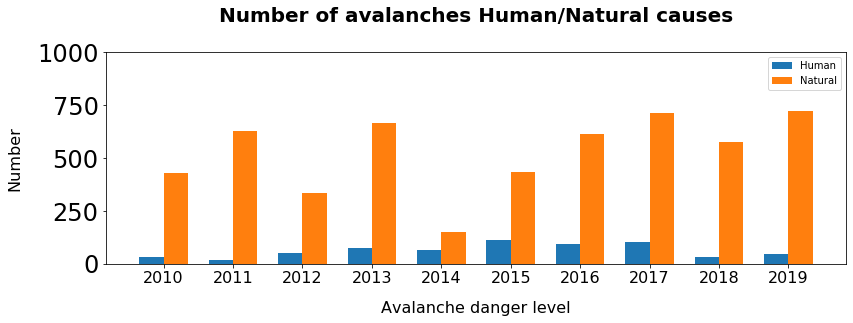

In [19]:
# General variable plotting
Title_size = {'fontsize': 20, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 16}
OffsetAxes = 15
OffsetTitle = 30
FigWidth = 20
FigHeigth = 5
plt.style.use('..\..\..\.matplotlib\stylelib\scientific2.mplstyle')

# Define the variables for that plot
V1='Human'
V2='Natural'

# Define the label and the x an y value
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_Level_Years.Num_Human.iloc[-10:], width, label=str(V1))
rects2 = ax.bar(x + width/2, df_Level_Years.Num_Natural.iloc[-10:], width, label=str(V2))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number',fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylim(top= 1000)
ax.set_title('Number of avalanches Human/Natural causes',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict = Legend_size)
ax.legend()
fig.tight_layout()
fig.set_figwidth(FigWidth)
fig.set_figheight(FigHeigth)
plt.savefig('../Plots/Num_of_avlanches_HUMAN-NATURAL.jpg')
plt.show()